# Script for studying the use of graphs in python:

In [2]:
import numpy as np
from random import uniform,randint
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy import signal
import networkx as nx
import math
from numpy import meshgrid
#import jgraph as ig
from six.moves import input

In [3]:
from modules.distances import l1dist, l2dist, distgraph

In [4]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0

npoints = 10
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [35]:
for i in range(npoints):
    node[i] = i
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

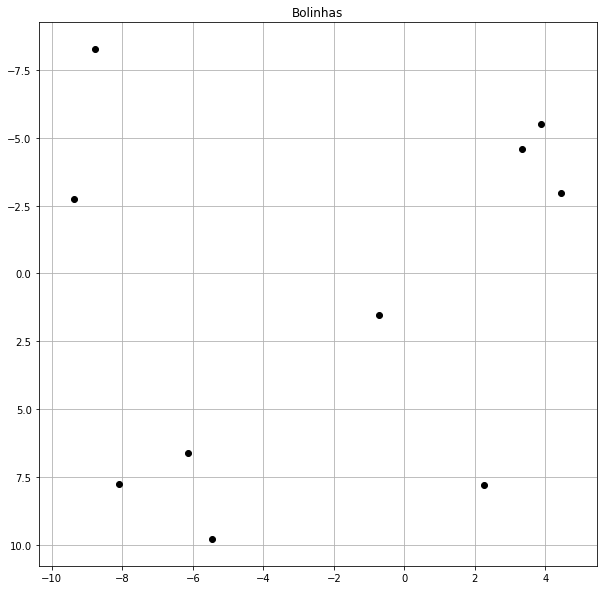

In [36]:
###--------##########################
plt.figure( figsize=(10,10) )
p1 = plt.plot(x, y, 'ok' )
plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [37]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i ,pos=(x[i],y[i]))
    for j in range(npoints):
        S.add_edge(i,j,weight=l2dist(x,y)[i][j])
TS = nx.minimum_spanning_tree(S)

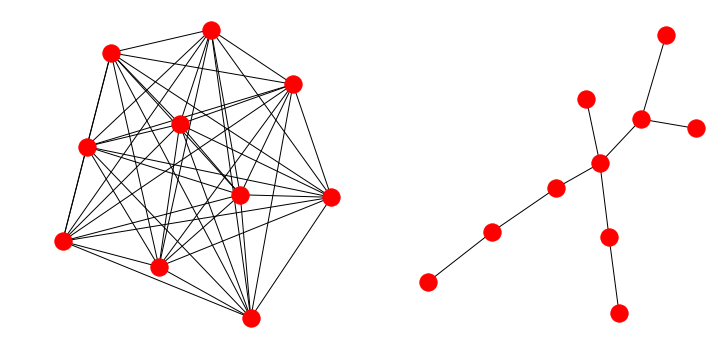

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

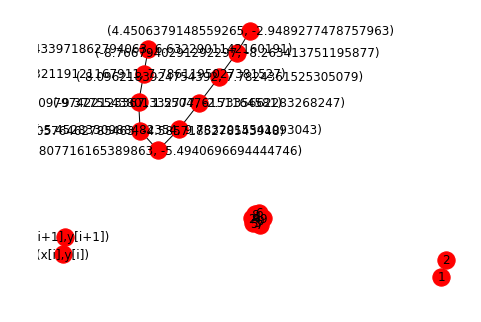

In [47]:
#TENTANDO COLOCAR LABELS NOS VERTICES
S.add_edge((x[1],y[1]),(x[2],y[2]))
nx.draw(S, with_labels = True)
plt.savefig('labels.png')

# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})^2$

In [39]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi, dmst = distgraph(TS)
print(phi, dmst)

70.3390926364 4.99467503588


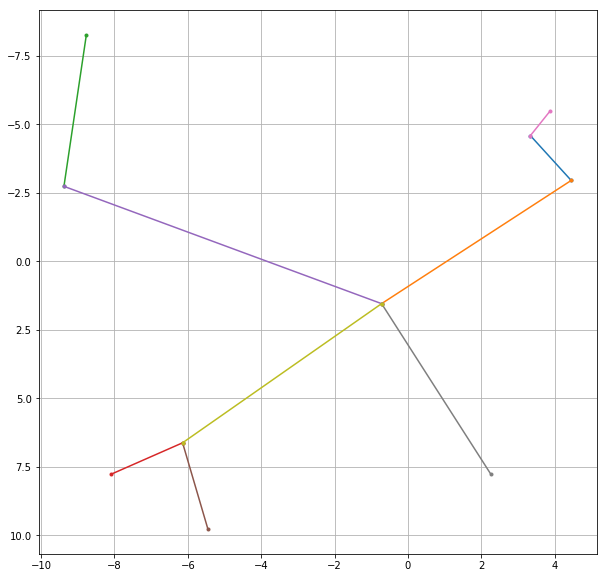

In [40]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )
for (i, j, d) in TS.edges.data('weight'):
    xt = [ x[i], x[j] ]
    yt = [ y[i], y[j] ]
    plt.plot(xt,yt,'.-')
plt.grid()
plt.gca().invert_yaxis()
plt.savefig('L2dist.pdf')
plt.show()


# TODO: Fazer testes simples para verificar a função distGraf:
> 1) um circulo de pontos igualmente espaçados e aleatorios; <br>
> 2) um retangulo de pontos igualmente espaçados e aleatórios; <br>
> 3) plotar a àrvore com os índices dos vértices para identificação;<br>

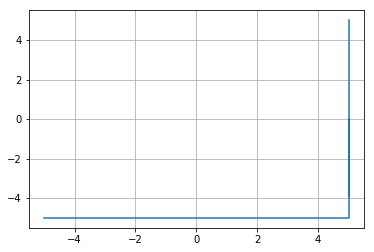

In [24]:
#PLOTA UM L PARA TESTAR A FUNCAO DISTGRAPH E O NETWORKX
ax = np.linspace(-5,5,npoints)
ay = np.zeros(npoints)
ay = 5 + ay
by = np.linspace(-5,5,npoints)
bx = np.zeros(npoints)
bx = -5 + bx
ax1 = np.linspace(-5,5,npoints)
ay1 = np.zeros(npoints)
ay1 = -5 + ay1
by1 = np.linspace(-5,5,npoints)
bx1 = np.zeros(npoints)
bx1 = 5 + bx1

a = np.zeros(2*npoints)
b = np.zeros(2*npoints)

for i in range(0,npoints):
    a[i] = ax[i]
for i in range(npoints,2*npoints):
    a[i] = ay[i - npoints]
b = np.zeros(2*npoints)
for i in range(0,npoints):
    b[i] = bx[i]
for i in range(npoints+1,2*npoints):
    b[i] = by[i - npoints]
L = (a,b)
plt.plot(a,b)
plt.grid()
plt.show()

In [25]:
S1 = nx.Graph()
for i in range(2*npoints):
    S1.add_node(i ,pos=(L[0][i],L[1][i]))
    for j in range(2*npoints):
        S1.add_edge(i,j,weight=l2dist(a,b)[i][j])
TS1 = nx.minimum_spanning_tree(S1)

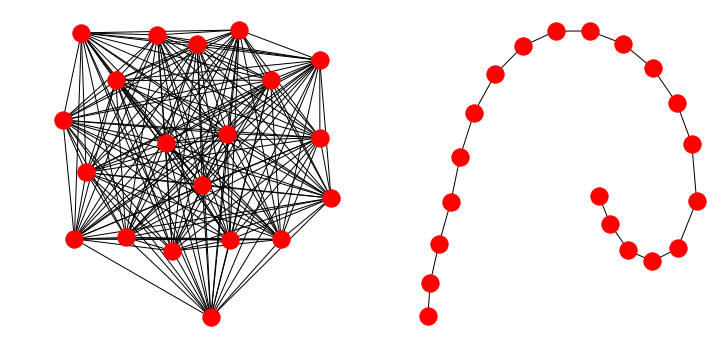

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S1)
plt.subplot(122)
nx.draw(TS1)
plt.show()

In [27]:
#Calculating the phi funtcion and the mean
phi1, dmst1 = distgraph(TS1)
print(phi1, dmst1) #this makes sense since the average is close enough to every point

0.552306692658 1.05263157895


1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
0.555555555556
0.555555555556
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111
1.11111111111


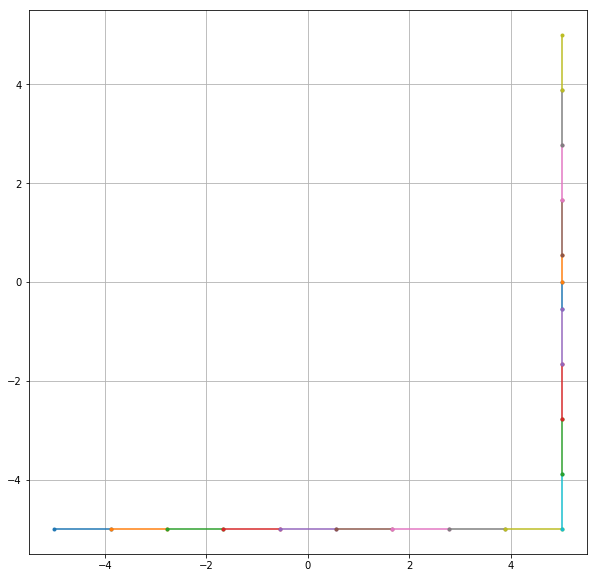

In [28]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )
for (i, j, d) in TS1.edges.data('weight'): 
    print(d)
    at = [ a[i], a[j] ]
    bt = [ b[i], b[j] ]
    plt.plot(at,bt,'.-')
plt.grid()
plt.savefig('L2dist.pdf')
plt.show()